**Import necessary libraries**

In [6]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

Mounted at /content/drive


**Assign the path for the test data**

In [2]:
test_data = '/content/drive/MyDrive/test_data.txt'

**Assign the path for the train data**

In [3]:
train_data = '/content/drive/MyDrive/train_data.txt'

**Read the data from the uploaded files**

In [8]:
test_df = pd.read_csv(test_data, delimiter=':::', engine='python', names=['ID', 'TITLE', 'DESCRIPTION'])
train_df = pd.read_csv(train_data, delimiter=':::', engine='python', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])

**Preprocess data**

In [10]:
le = LabelEncoder()
train_df['GenreEncoded'] = le.fit_transform(train_df['GENRE'])

**Vectorize text data**

In [13]:
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_vectorized = vectorizer.fit_transform(train_df['DESCRIPTION'])

**Train logistic regression model**

In [14]:
classifier = LogisticRegression()
classifier.fit(X_train_vectorized, train_df['GenreEncoded'])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Allow user to input a movie description and predict the genre with probabilities**

In [20]:
user_input = input("Enter a movie description: ")
user_input_vectorized = vectorizer.transform([user_input])
predicted_probabilities = classifier.predict_proba(user_input_vectorized)[0]

Enter a movie description: Before he was known internationally as a martial arts superstar, Bruce Lee had appeared in a handful of Hong Kong films as a child star in the 1940s/50s. One of these early films was The More the Merrier (1955), a.k.a. We Owe it to Our Children from the Union Film Enterprise, a family melodrama written and directed by renowned filmmaker Chin Chien (My Intimate Partners). Featuring the 14-year-old Bruce Lee and future Cantonese Opera star Yuen Siu Fai, the B&W film revolves around accountant Ming (played by Cheung Wood Yau) and his wife (Tsi Lo Lin) who suffers a miscarriage in an car accident. The couple decides to adopt a baby girl, not knowing that she's the daughter given up by Ming's poor co-worker who struggles to feed a bunch of kids. Bruce Lee plays the slacker son of the landlord (Ko Lo Chuen).


**Display predicted genre with the highest probability**

In [21]:
predicted_genre_index = predicted_probabilities.argmax()
predicted_genre = le.classes_[predicted_genre_index]
predicted_percentage = (predicted_probabilities[predicted_genre_index] / predicted_probabilities.sum()) * 100

print(f"The predicted genre is: {predicted_genre} with {predicted_percentage:.2f}% probability.")

The predicted genre is:  drama  with 65.85% probability.


**Plot the count of movies in each genre**

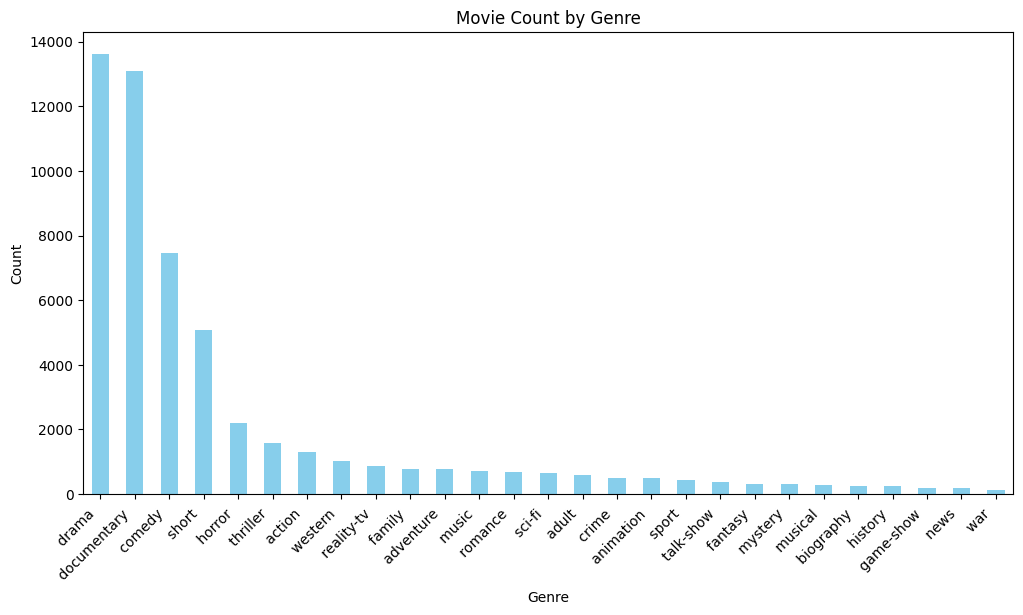

In [23]:
genre_counts = train_df['GENRE'].value_counts()
genre_counts.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Movie Count by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()